## **Data**

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


## **EDA**

In [5]:
df.describe()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
count,98,98,98,16,32,98,98,89,98,98,98,75
unique,90,11,26,16,5,54,34,88,5,6,1,2
top,8/28/2018,Mortgage,Other mortgage,When my loan was switched over to Navient i wa...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,606XX,Web,Closed with explanation,Yes,No
freq,3,35,13,1,20,11,15,2,72,81,98,56


In [4]:
df['Sub-product'].fillna('Other mortage',inplace=True)

In [3]:
df.shape

(98, 12)

In [6]:
print(df.isnull().sum())

Date received                    0
Product                          0
Sub-product                      0
Consumer complaint narrative    82
Company public response         66
Company                          0
State                            0
ZIP code                         9
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              23
dtype: int64


In [7]:
df.dropna(subset=['State'], inplace=True)

In [35]:
df.drop('Timely response?', axis=1, inplace=True)
df.drop('Date received', axis=1, inplace=True)

In [9]:
df['Sub-product'].fillna('Unknown', inplace=True)
df['Consumer disputed?'].fillna('N/A', inplace=True)

In [10]:
df['Consumer complaint narrative'].fillna("No feedback", inplace=True)
df['Company public response'].fillna('No feedback', inplace=True)

In [11]:
df.dropna(subset=['State'], inplace=True)

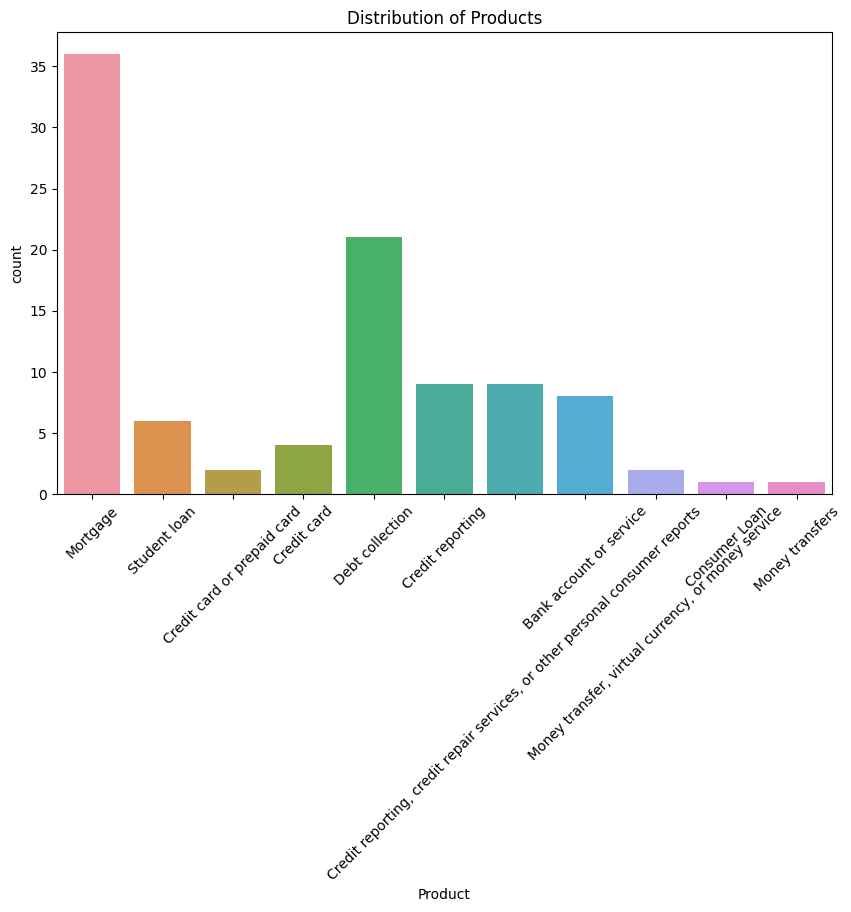

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product')
plt.xticks(rotation=45)
plt.title('Distribution of Products')
plt.show()

In [13]:
df.head()

,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Consumer disputed?
0,Mortgage,Other mortgage,No feedback,No feedback,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,No
1,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,No feedback,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,No
2,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,No feedback,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,N/A
3,Credit card,Other mortage,No feedback,No feedback,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes
4,Debt collection,Credit card,No feedback,No feedback,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes


# Data Wrangling

In [16]:
df2 = df.loc[: ,['Product','Sub-product','Consumer complaint narrative','Company public response','Company','State','Submitted via','Company response to consumer','Consumer disputed?']]


In [17]:
df2.describe()

,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,Submitted via,Company response to consumer,Consumer disputed?
count,98,98,98,98,98,98,98,98,98
unique,11,26,17,6,54,34,5,6,3
top,Mortgage,Other mortgage,No feedback,No feedback,Experian Information Solutions Inc.,CA,Web,Closed with explanation,No
freq,35,13,82,66,11,15,72,81,56


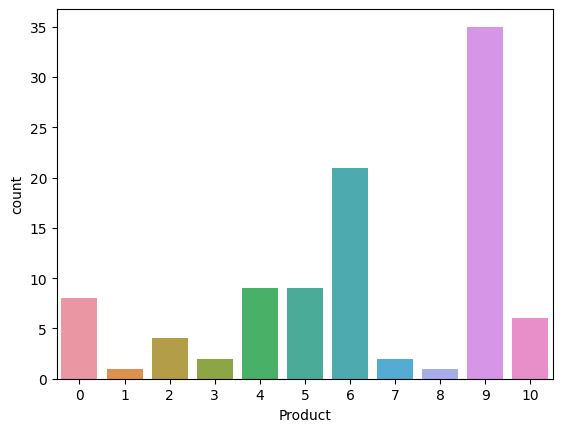

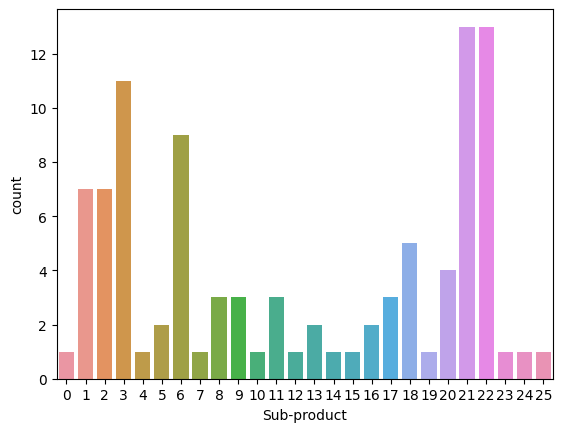

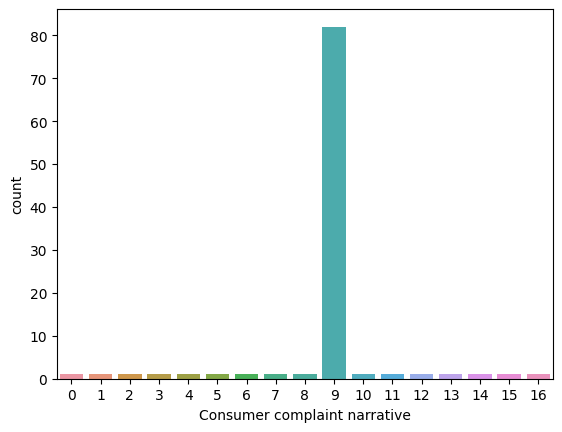

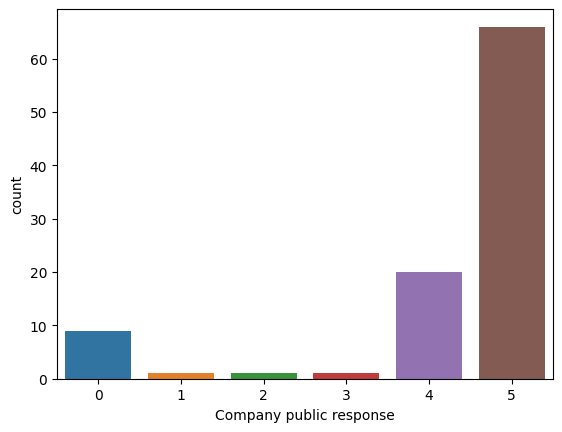

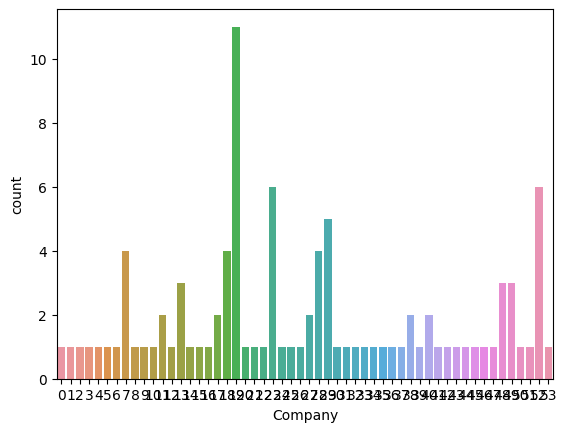

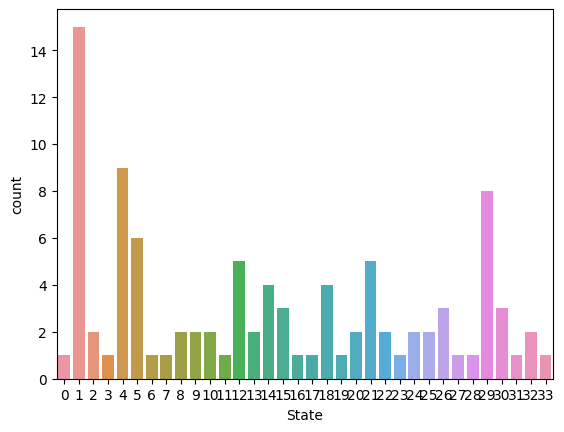

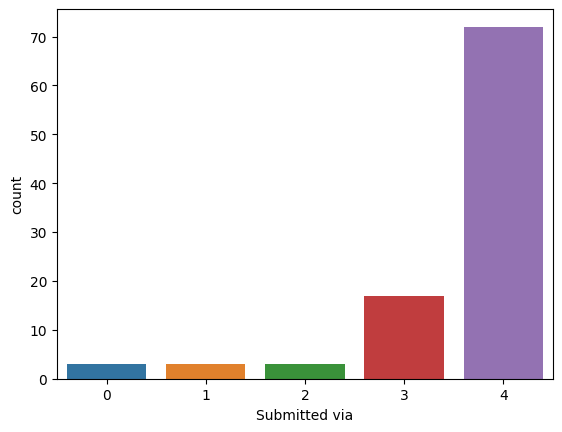

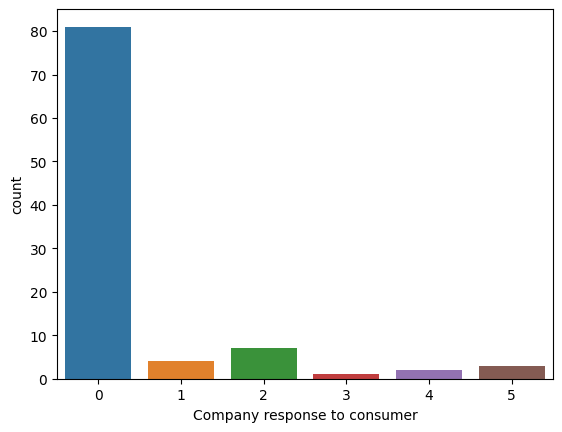

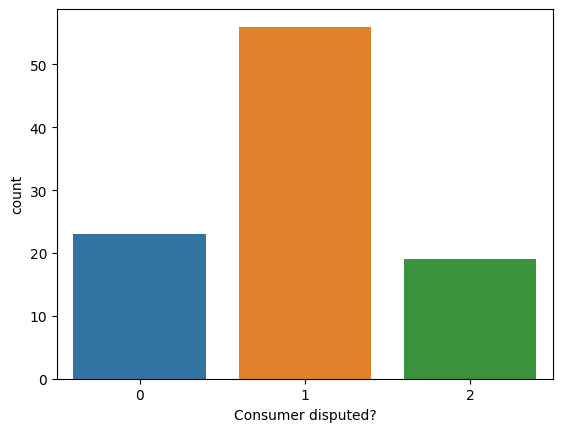

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in df2.columns:
    ax = sns.countplot(x=df2[i],data=df2)
    plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
df2['Product'] = lb1.fit_transform(df2['Product'])
lb2 = LabelEncoder()
df2['Sub-product'] = lb2.fit_transform(df2['Sub-product'])
lb3 = LabelEncoder()
df2['Consumer complaint narrative'] = lb3.fit_transform(df2['Consumer complaint narrative'])
lb4 = LabelEncoder()
df2['Company public response'] = lb4.fit_transform(df2['Company public response'])
lb5 = LabelEncoder()
df2['Company'] = lb5.fit_transform(df2['Company'])
lb6 = LabelEncoder()
df2['State'] = lb6.fit_transform(df2['State'])
lb7 = LabelEncoder()
df2['Submitted via'] = lb7.fit_transform(df2['Submitted via'])
lb8 = LabelEncoder()
df2['Company response to consumer'] = lb8.fit_transform(df2['Company response to consumer'])
lb9 = LabelEncoder()
df2['Consumer disputed?'] = lb9.fit_transform(df2['Consumer disputed?'])
df2

,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,Submitted via,Company response to consumer,Consumer disputed?
0,9,22,9,5,24,14,3,0,1
1,10,9,15,5,28,10,4,0,1
2,3,10,6,5,11,30,4,0,0
3,2,21,9,5,2,7,4,0,2
4,6,5,9,5,13,30,4,0,2
...,...,...,...,...,...,...,...,...,...
94,8,7,9,5,25,14,4,1,1
95,9,2,9,5,27,3,4,0,1
96,7,15,9,5,12,1,4,0,0
97,4,21,9,4,19,4,4,2,1


**business problems**

1:Fraudulent Transactions Detection:
Business Problem: Identifying and preventing fraudulent transactions that lead to consumer disputes.

2:Root Cause Analysis for Disputes:
Business Problem: Understanding the underlying reasons for consumer disputes to address the root causes.

3:Personalized Dispute Resolution:
Business Problem: Providing personalized solutions to consumers' disputes based on their individual preferences and behaviors.

4:Early Warning System for Disputes:
Business Problem: Developing a system that predicts potential disputes before they occur, allowing proactive resolution.

5:Optimizing Customer Support Responses:
Business Problem: Enhancing customer support by providing agents with insights and suggestions during consumer interactions about how to handle disputes effectively.

**In order to improve the consumer dispute rate machine learning models like regression , knn , and decision trees can be the best fitted models.**


# Machine Learning Models
Logistic Regression

RandomForestClassifier


Support Vector Machine

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob

X = df2.drop(columns=['Product','Company response to consumer','Consumer disputed?'])
y = df2['Product']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("=" * 50)

Model: Logistic Regression
Accuracy: 0.3000
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.20      1.00      0.33         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           9       0.45      0.50      0.48        10
          10       0.00      0.00      0.00         1

    accuracy                           0.30        20
   macro avg       0.07      0.17      0.09        20
weighted avg       0.24      0.30      0.25        20

Model: Random Forest
Accuracy: 0.7000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         1
  

# Apply NLP & K-Means Clustring


In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')

data = data[['Consumer complaint narrative']]
data.dropna(inplace=True)

In [26]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

data['cleaned_narrative'] = data['Consumer complaint narrative'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(data['cleaned_narrative'])

1    9
0    2
4    2
2    2
3    1
Name: cluster, dtype: int64


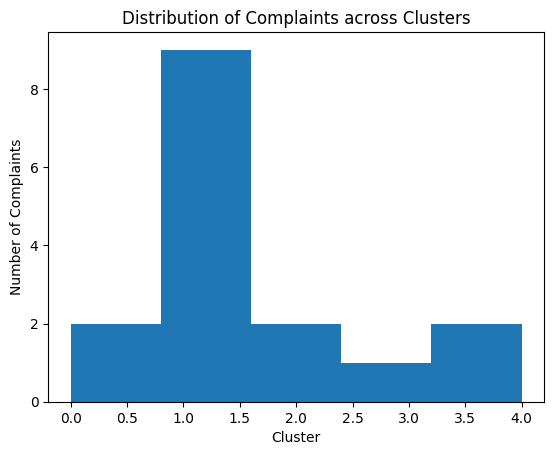

In [28]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(tfidf_matrix)

print(data['cluster'].value_counts())

plt.hist(data['cluster'], bins=num_clusters)
plt.xlabel('Cluster')
plt.ylabel('Number of Complaints')
plt.title('Distribution of Complaints across Clusters')
plt.show()